## KMeans clustering analysis with Landing Page data

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

See what the optimal average session durations are based on the conversion rates.

#### Importing the dataset

In [2]:
df = pd.read_excel('raw.xlsx', sheet_name = 'Dataset1')
df

,Landing Page,Sessions,% New Sessions,New Users,Bounce Rate,Pages / Session,Session_Duration_Avg,Conversion_Rate,Purchase Completed (Goal 1 Completions),Purchase Completed (Goal 1 Value)
0,/home,2476549,0.749420,1855976,0.452753,4.532666,164.070692,0.012428,30778,0
1,/google+redesign/shop+by+brand/youtube,512826,0.903367,463270,0.578099,2.794511,77.866103,0.001392,714,0
2,/,153659,0.848014,130305,0.551279,5.960790,128.080828,0.004874,749,0
3,/shop.axd/Home,146085,0.716562,104679,0.303399,10.794401,225.420762,0.026512,3873,0
4,/google+redesign/apparel/mens/mens+t+shirts,139884,0.838052,117230,0.400267,4.915566,173.178598,0.005262,736,0
...,...,...,...,...,...,...,...,...,...,...
4996,/shop.axd/ProductDetails?edp_no=59716,3,0.000000,0,0.666667,2.000000,23.333333,0.000000,0,0
4997,/shop.axd/ProductDetails?edp_no=61234,3,0.666667,2,1.000000,1.000000,0.000000,0.000000,0,0
4998,/shop.axd/ProductDetails?edp_no=62144,3,0.000000,0,1.000000,1.000000,0.000000,0.000000,0,0
4999,/shop.axd/returnpolicy,3,0.666667,2,0.333333,4.000000,169.333333,0.000000,0,0


Create a new dataframe that contains the two columns that we are interested in: avg session duration and conversion rate

In [3]:
X2 = pd.DataFrame(df, columns = ['Session_Duration_Avg','Conversion_Rate'])

#### Detect  and remove outliers

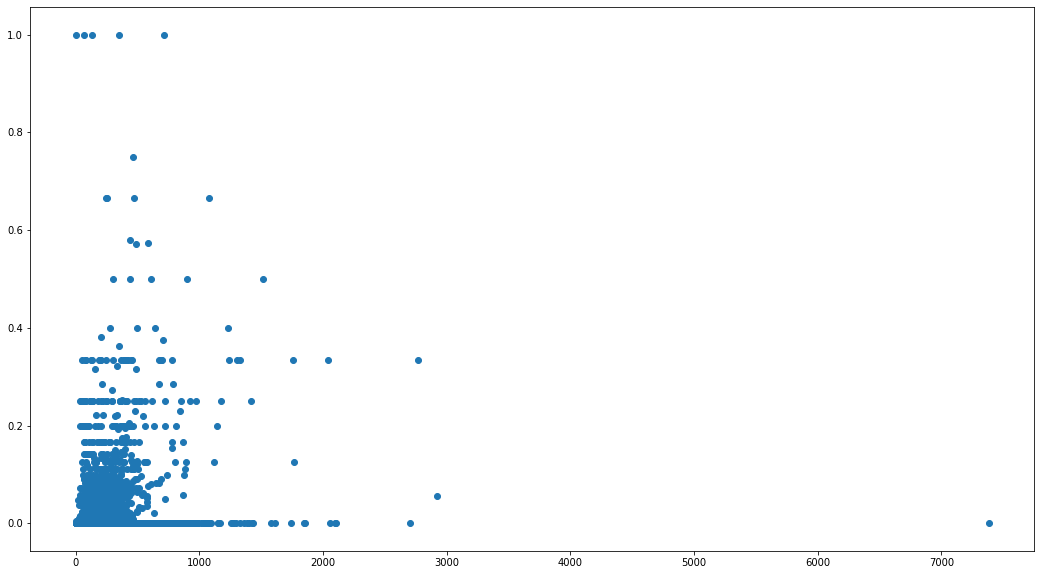

In [4]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df['Session_Duration_Avg'],df['Conversion_Rate'])

Using the above scatter plot, we can see that the outlier clearly is approximately at when Average Session Duration is greater than 7000 seconds.

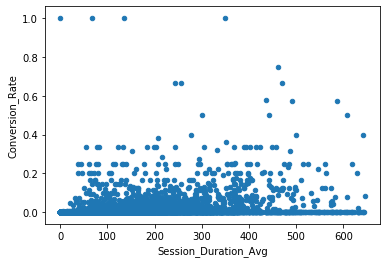

In [5]:
SD = np.std(X2)
UP= np.mean(X2) + 2* (SD)
X2 = X2[X2["Session_Duration_Avg"] <= UP["Session_Duration_Avg"]] 
X2.plot.scatter('Session_Duration_Avg', 'Conversion_Rate')

Now we can see that the outlier has been eliminated.

In [6]:
df = df[df['Session_Duration_Avg'] <= UP["Session_Duration_Avg"]]

Figure out the optimal amout of clusters -- elbow method.

In [7]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 10)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

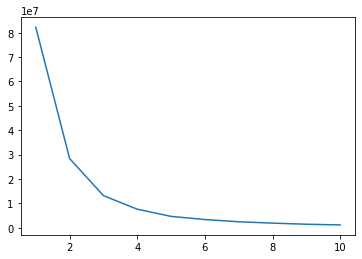

In [8]:
plt.plot(range(1,11),wcss)
plt.show()

Elbow shape is created at the point of 4, the optimal number of clusters is 4. Train the model on the dataset with a number of clusters 4.

In [9]:
kmeans = KMeans(n_clusters = 4).fit(X2)
centroids = kmeans.cluster_centers_
#print(centroids)
for centroid in centroids:
    print('Avg Session: {}'.format(centroid[0]/60), 'Conversion Rate: {}'.format(centroid[1]))

Avg Session: 2.6145698070222667 Conversion Rate: 0.015873175268099622
Avg Session: 0.6544729977109474 Conversion Rate: 0.00593526498751366
Avg Session: 8.017552660619438 Conversion Rate: 0.05835391218017623
Avg Session: 4.83832151396064 Conversion Rate: 0.03021850741920737


In [10]:
centroids

array([[1.56874188e+02, 1.58731753e-02],
       [3.92683799e+01, 5.93526499e-03],
       [4.81053160e+02, 5.83539122e-02],
       [2.90299291e+02, 3.02185074e-02]])

In [11]:
plt.rcParams["figure.figsize"] = (20,10)  # change the size 

See how the data is clustered.

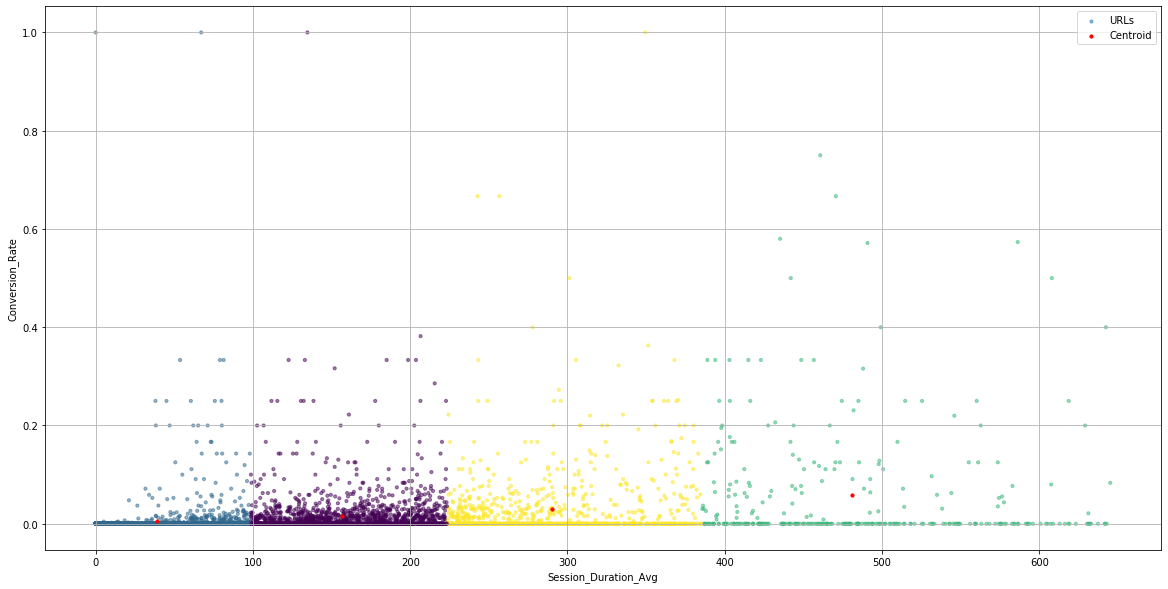

In [12]:
plt.scatter(df['Session_Duration_Avg'], df['Conversion_Rate'], c=kmeans.labels_.astype(float), s=10, alpha = 0.5, label = 'URLs')
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=10, label = 'Centroid')
#ax = plt.gca()
#ax.set_xscale('log')
plt.ylabel('Conversion_Rate')
plt.xlabel('Session_Duration_Avg')
plt.grid()
plt.legend()

#### Conclusion

* The first cluster and the second cluster show that the consumers who spend very little time (averagely around 35 seconds and 2 minutes ) on the website tends to make less purchases (maybe they accidentally clicked the link and landed on the website).

* The third and fourth cluster show that the consumer groups that spend longer time (around 4 min and 6 min ) on the website achieves to a higher conversion rate which shows that they were more interested in the products, and wanted to spend more time to find the detailed information of the products therefore make purchases.

* Our goal is to make the user experience better and then raise the conversion rate for all different 4 clusters.

#### To see the 4 clusters better, logarithmic scale display

'Session_Duration_Avg' is centered around 0, with some values very far from 0. Display the x on a logarithmic scale.

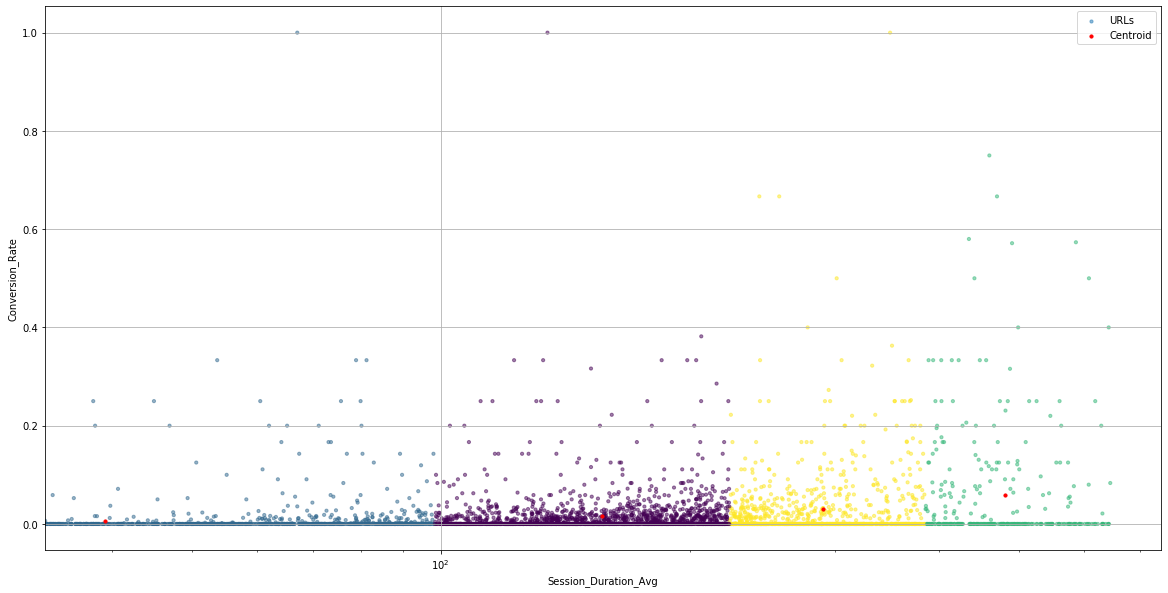

In [13]:
plt.scatter(df['Session_Duration_Avg'], df['Conversion_Rate'], c=kmeans.labels_.astype(float), s=10, alpha = 0.5, label = 'URLs')
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=10, label = 'Centroid')
ax = plt.gca()
ax.set_xscale('log')
plt.ylabel('Conversion_Rate')
plt.xlabel('Session_Duration_Avg')
plt.grid()
plt.legend()

# Cluster Analysis by Age Group

The optimal Avg session duration clusters based on the conversion rate among different age groups.

In [14]:
raw_data = pd.read_excel('raw_age.xlsx', sheet_name = 'Dataset1')

In [15]:
# hardcoded values
core_columns = ['Session_Duration_Avg','Conversion Rate']
split_column = 'Age'

In [16]:
# function 1
def get_unique_age_groups(raw_data, col_name):
    age_content = raw_data[col_name].unique()
    # drop nans 
    age_content = [v for v in age_content if v == v]    
    return age_content

#function 2
def remove_outliers(core_col_df, sd_to_remove):
    standard_deviation = np.std(core_col_df)
    upper_bound = np.mean(core_col_df) + sd_to_remove * (standard_deviation)
    core_col_df = core_col_df[core_col_df["Session_Duration_Avg"] <= upper_bound["Session_Duration_Avg"]]    
    return core_col_df

#function 3
def generate_age_groups_data(raw_data, colname, remove_outliers_flag = False):
    '''
    suppose to return a list of dataframes with each age group
    '''
    age_groups_data = []
    for age_group in get_unique_age_groups(raw_data, colname):
        df = raw_data[raw_data[colname] == age_group]
        if remove_outliers_flag:
            df = remove_outliers(df, 2)
        age_groups_data.append(df)
        
    return age_groups_data

#function 4
def generate_dicts_of_age_group_dfs(raw_data,colname):
    dicts_of_age_group_dfs = {}
    for i in range(0,len(get_unique_age_groups(raw_data, colname))):  #iterating through diff age group
        dicts_of_age_group_dfs[get_unique_age_groups(raw_data, colname)[i]] = generate_age_groups_data(raw_data, colname)[i]
    return dicts_of_age_group_dfs

#function 5
def generate_core_col(df_age_group, list_of_columns):
    x2 = pd.DataFrame(df_age_group, columns = list_of_columns)
    return x2

#function 6
def generate_elbow_graph(x2,show_graph = False):
    wcss=[]
    for i in range(1,11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 10)
        kmeans.fit(x2)
        wcss.append(kmeans.inertia_)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.plot(range(1,11),wcss)
    #plt.savefig('./graphs/{0}.png'.format(file_name))
    if show_graph:
        plt.show()
    plt.clf()

#function generate all the elbow graphs
def generate_elbow_graphs(age_groups_data, core_columns, show_graph = False):
    for an_age_group_data in age_groups_data:
        x2 = generate_core_col(an_age_group_data, core_columns)
        generate_elbow_graph(x2, show_graph = show_graph)

In [17]:
get_unique_age_groups(raw_data, split_column)

['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

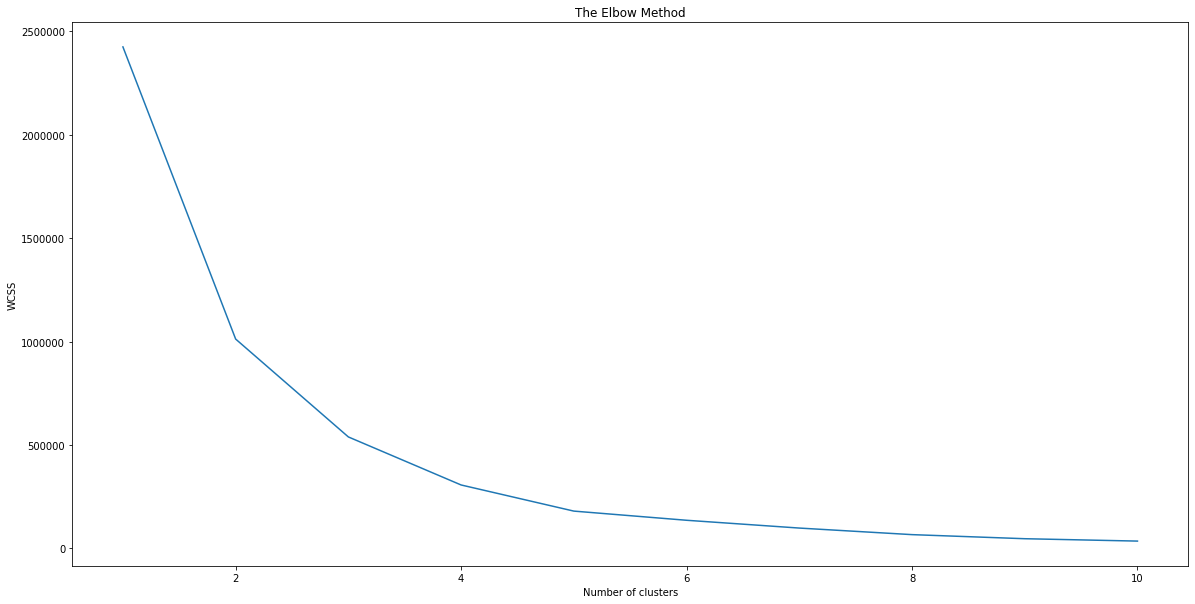

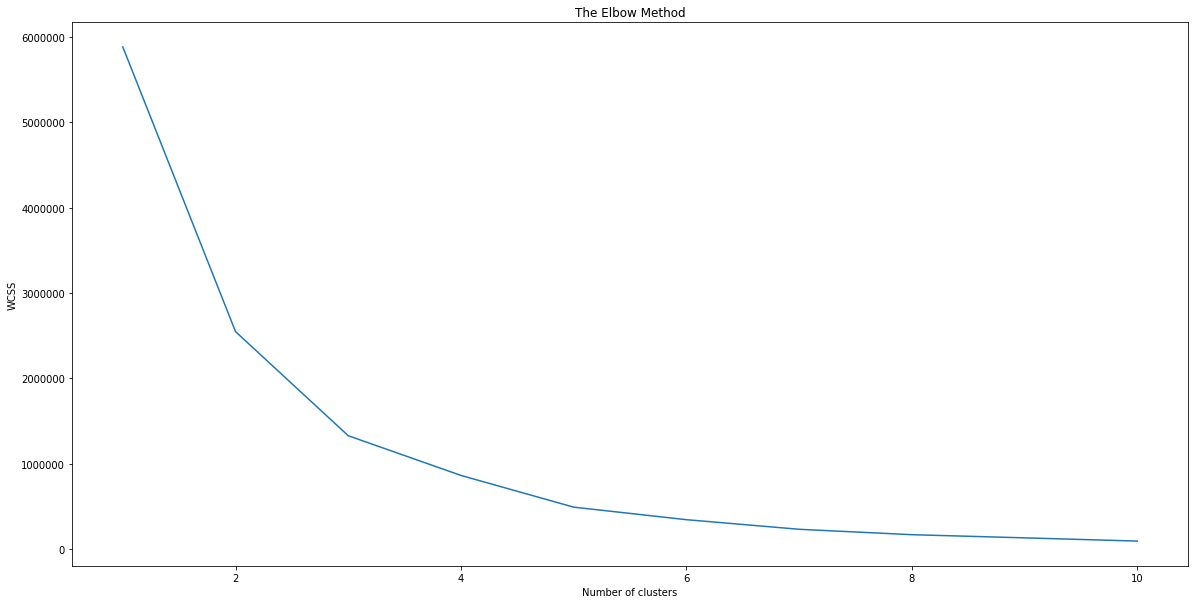

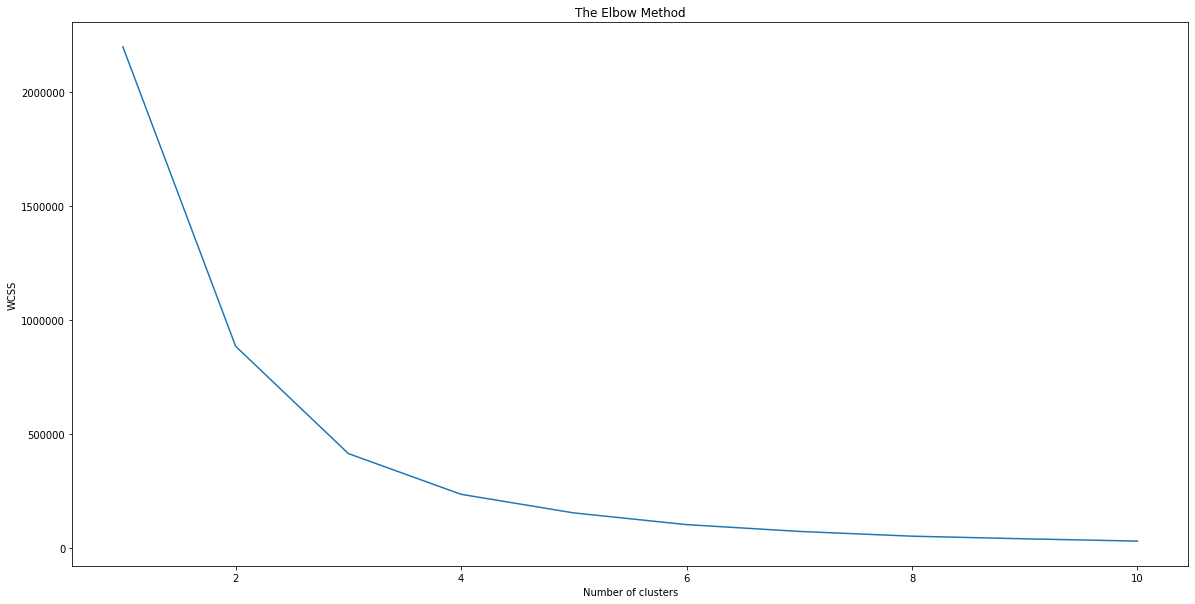

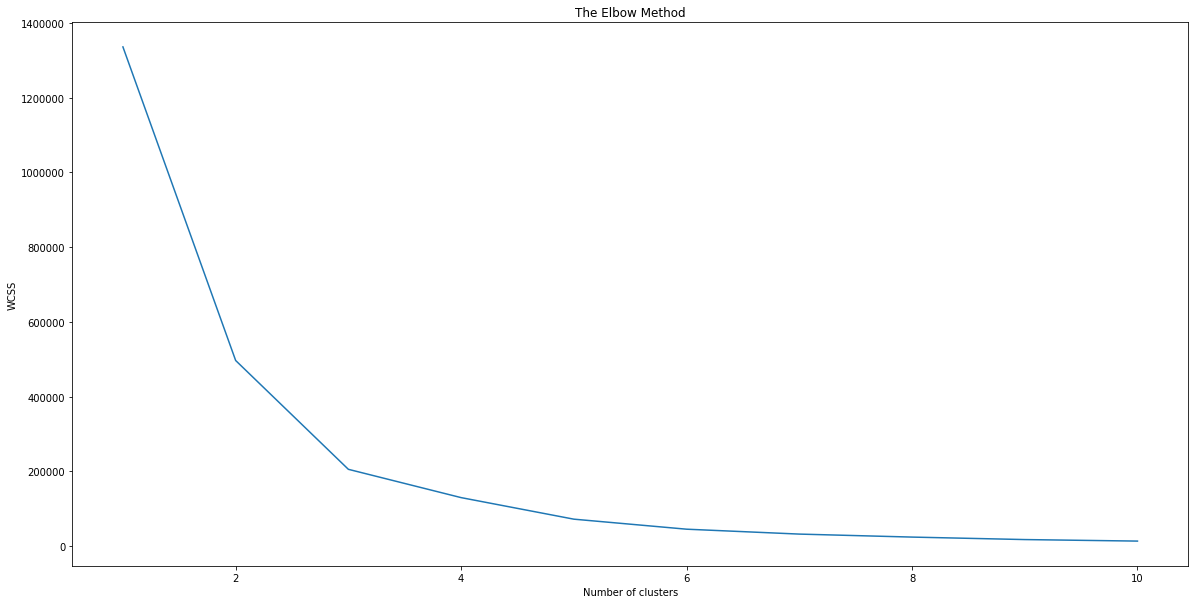

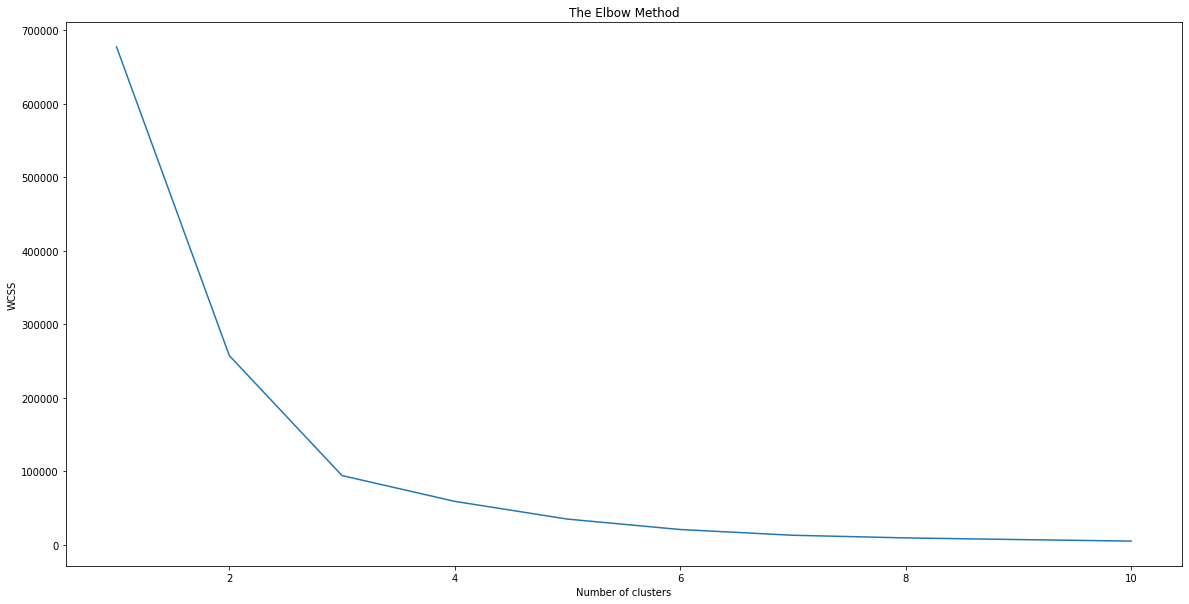

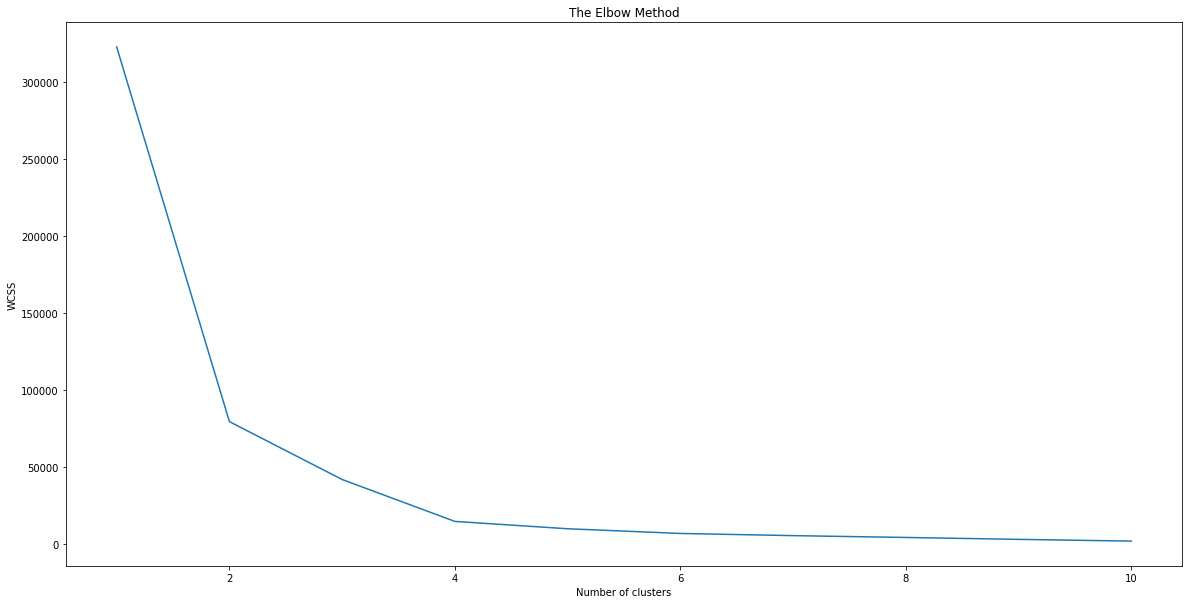

<Figure size 1440x720 with 0 Axes>

In [18]:
generate_elbow_graphs(generate_age_groups_data(raw_data, split_column),core_columns, True)

From the above elbow graphs, we can know each elbow point value for each age group.

In [19]:
n_clusters_array = [4,4,4,3,4,4]  #hard code selected elbow point values of each age group

In [20]:
#function4
def generate_centroids(n_clusters, only_core_cols_df, verbose = False):
    kmeans = KMeans(n_clusters=n_clusters).fit(only_core_cols_df)
    centroids = kmeans.cluster_centers_
    if verbose:
        for centroid in centroids:
            print('Avg Session: {}'.format(centroid[0]/60), 'Conversion Rate: {}'.format(centroid[1]))
    return centroids, kmeans

#function5
#list_of_columns refers to: 18-24, 25-36....
def generate_clusters_plot(one_age_content,an_age_group_data, centroids, kmeans, core_columns, file_name, show_graph = False):
    plt.title(one_age_content)
    #all the x values of the centroids, all the y values of the centroids
    plt.scatter(an_age_group_data[core_columns[0]], an_age_group_data[core_columns[1]], c=kmeans.labels_.astype(float), s=10, alpha = 0.5, label = 'URLs')
    plt.scatter(centroids[:,0], centroids[:,1], c='r', s=10, label = 'Centroid')
    #ax = plt.gca()
    #ax.set_xscale('log')
    plt.ylabel(core_columns[1])
    plt.xlabel(core_columns[0])
    plt.grid()
    plt.legend()
    plt.savefig('./graphs/{0}.png'.format(file_name))
    if show_graph:
        plt.show()
    plt.clf()

def generate_cluster_plots_of_all_age_groups(age_content,age_groups_data, n_clusters_array, core_col, verbose=False, show_graph = True):
    i=0
    for an_age_group_data in age_groups_data: #function 1 generates it
        one_age_content = age_content[i]
        x2 = generate_core_col(an_age_group_data, core_col)#generate the df with only the core columns
        centroids, kmeans = generate_centroids(n_clusters_array[i], x2, True)
        generate_clusters_plot(one_age_content,an_age_group_data, centroids, kmeans, core_col, age_content[i], show_graph)
        i+=1

#### Visualize the clusters

Avg Session: 5.560114629240639 Conversion Rate: 0.03653934894303591
Avg Session: 2.859295569939335 Conversion Rate: 0.006858512079840401
Avg Session: 1.0595616261816658 Conversion Rate: 0.002503883553542684
Avg Session: 10.890551364078606 Conversion Rate: 0.013530135301353014


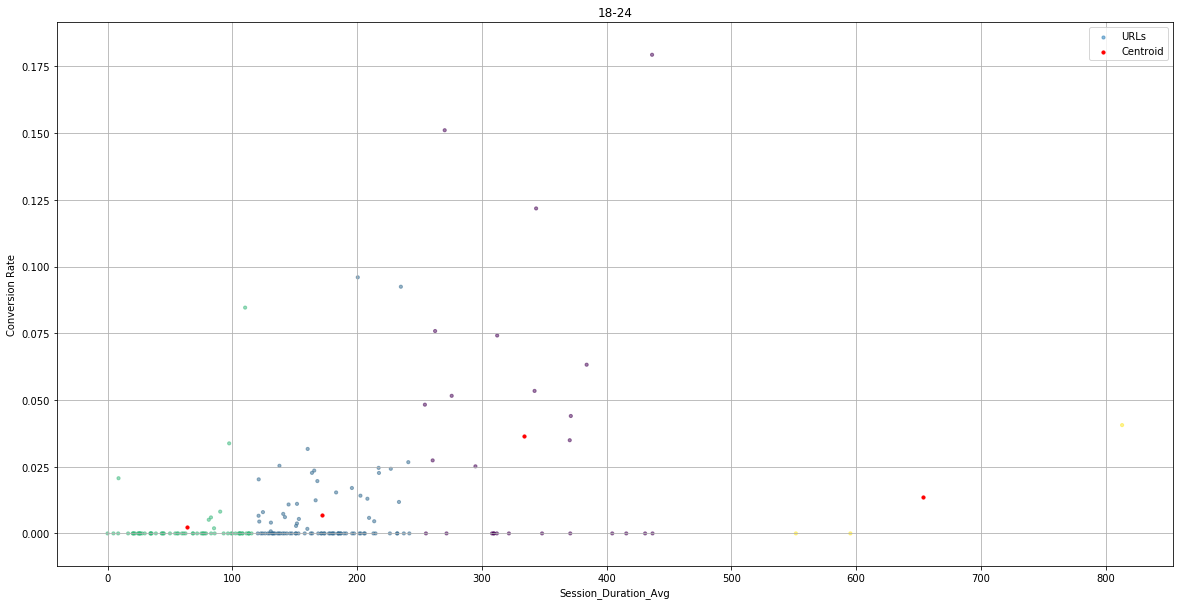

Avg Session: 3.648801338093323 Conversion Rate: 0.021849359445305312
Avg Session: 1.3399706275570453 Conversion Rate: 0.011916738257571892
Avg Session: 16.819106808156825 Conversion Rate: 0.05045871559633028
Avg Session: 7.771115716929895 Conversion Rate: 0.06598549685589805


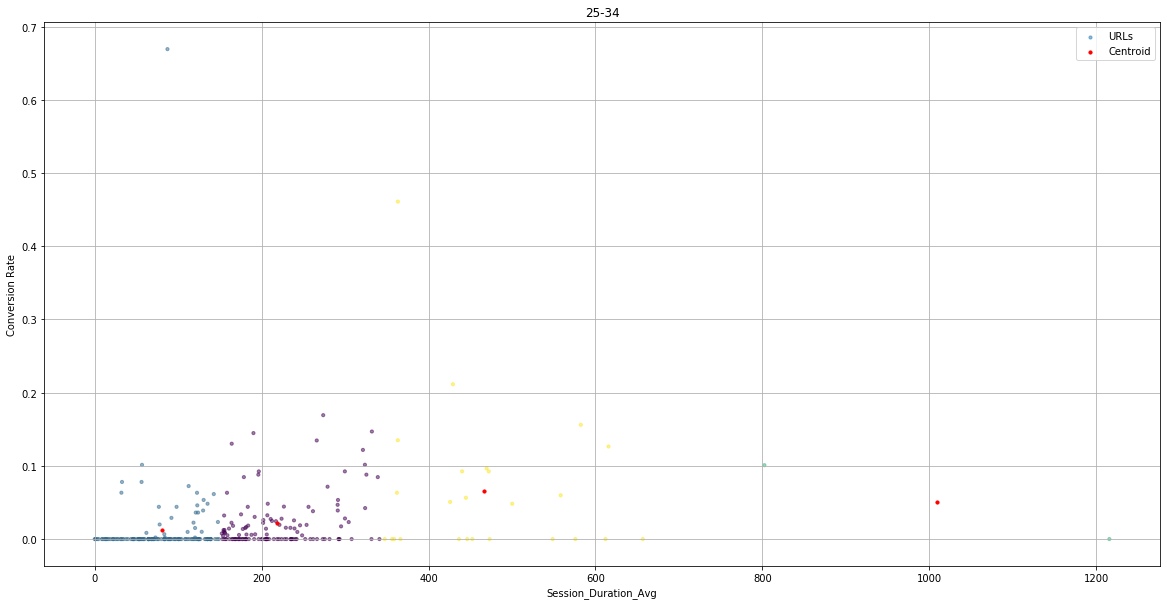

Avg Session: 1.1612850386415015 Conversion Rate: 0.007865146675360432
Avg Session: 4.794642808387541 Conversion Rate: 0.04802187569271352
Avg Session: 7.789587441413345 Conversion Rate: 0.09334424972112013
Avg Session: 3.0302665178159733 Conversion Rate: 0.01303509681367055


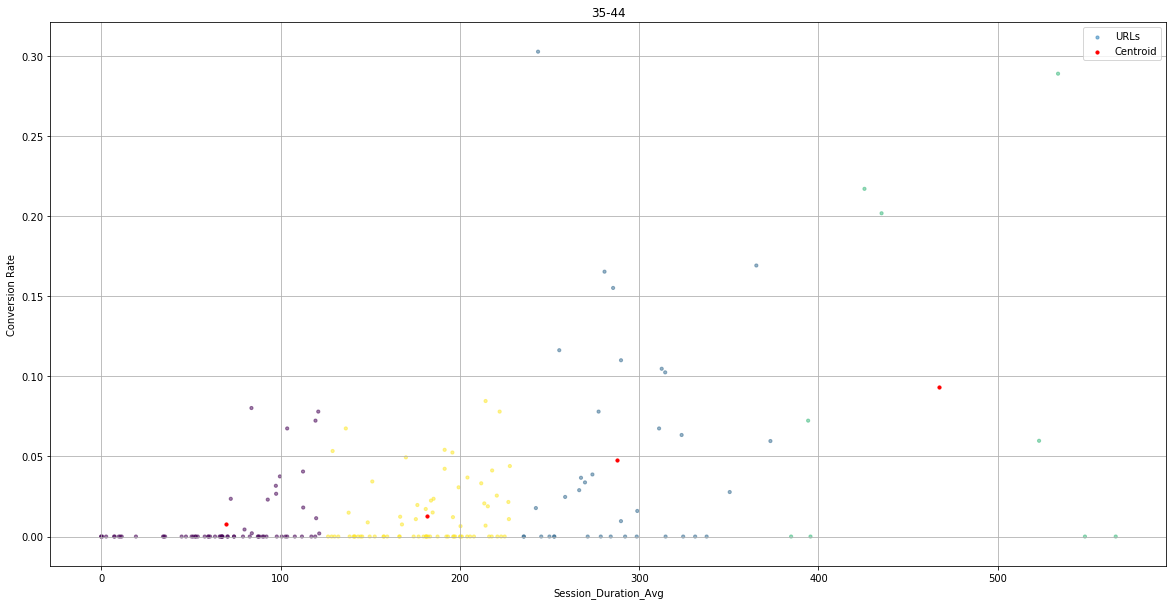

Avg Session: 0.7766653202271471 Conversion Rate: 0.005022286594719835
Avg Session: 3.107687845218344 Conversion Rate: 0.01720452864768173
Avg Session: 6.285429197651414 Conversion Rate: 0.07790887987862394


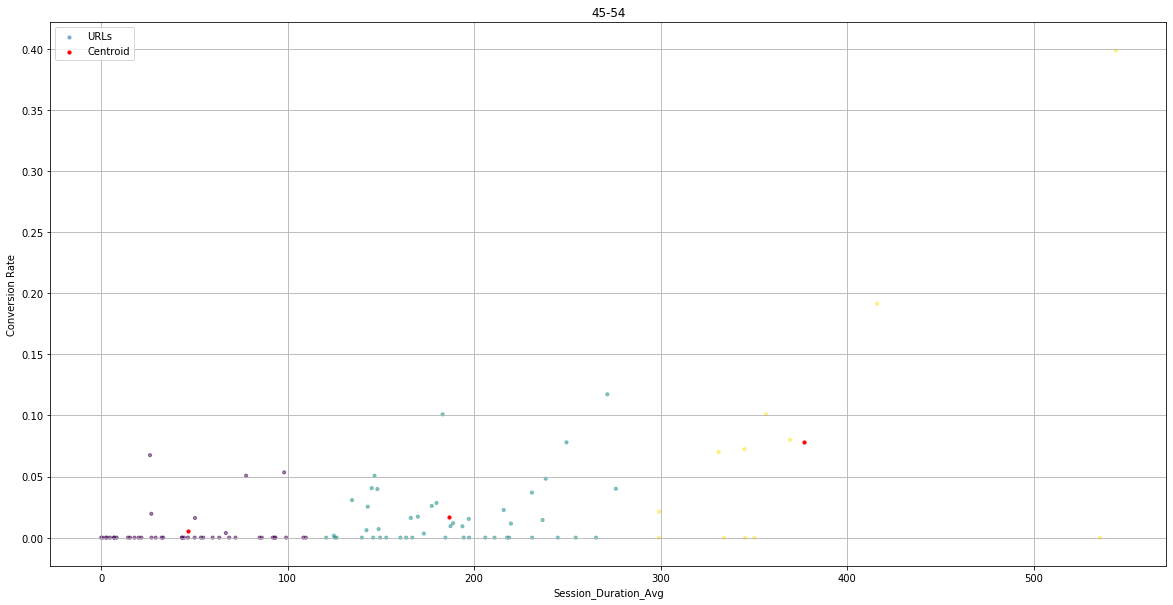

Avg Session: 1.5784380994441338 Conversion Rate: 0.0010556621880998124
Avg Session: 5.77279410649073 Conversion Rate: 0.06190473740990305
Avg Session: 0.3854614643148577 Conversion Rate: 5.955603681646361e-05
Avg Session: 2.9335855281008687 Conversion Rate: 0.01924710353889678


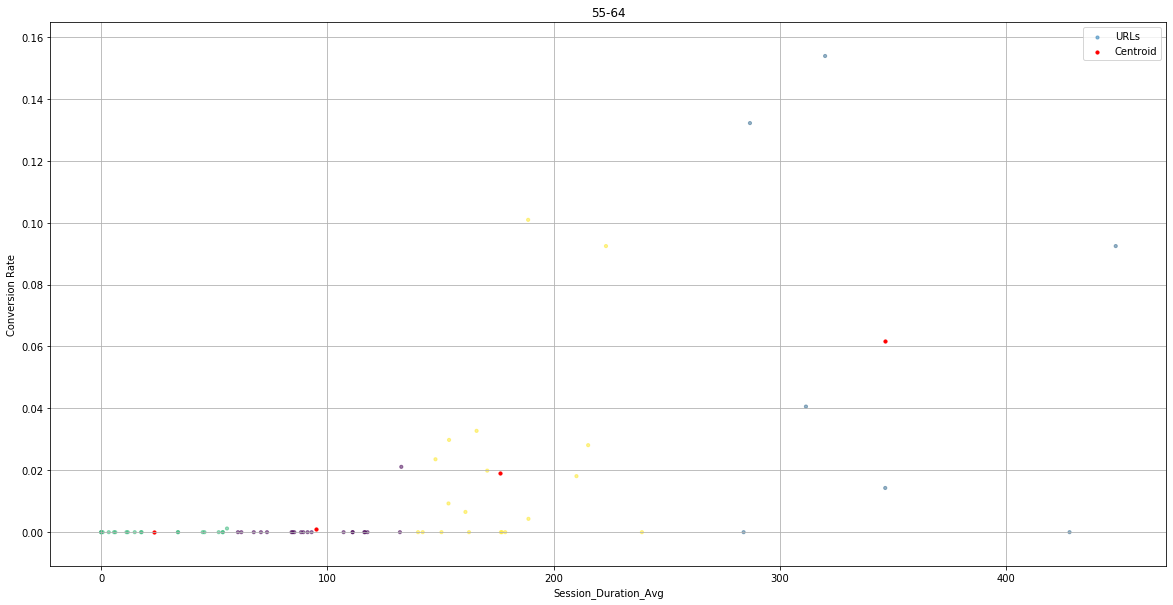

Avg Session: 1.7128421274560395 Conversion Rate: 0.0007255144688492173
Avg Session: 4.890177049918742 Conversion Rate: 0.04723226940316544
Avg Session: 0.5111604051540707 Conversion Rate: 3.469446951953614e-18
Avg Session: 3.2124892295924523 Conversion Rate: 0.010760140853201178


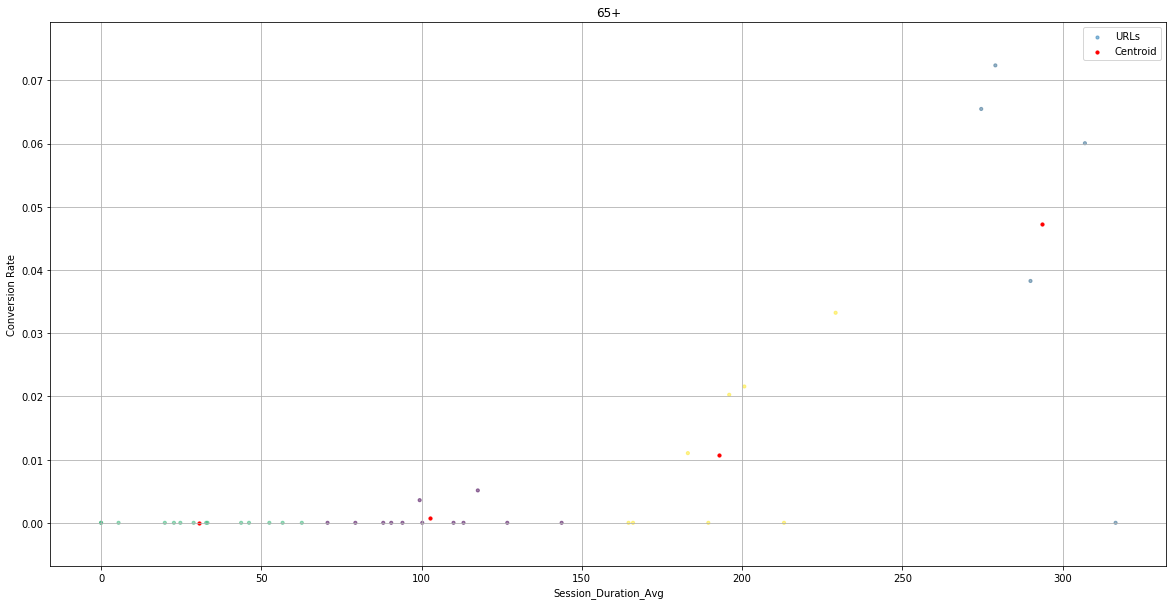

<Figure size 1440x720 with 0 Axes>

In [21]:
generate_cluster_plots_of_all_age_groups(get_unique_age_groups(raw_data, split_column),generate_age_groups_data(raw_data, split_column), n_clusters_array, core_columns, show_graph = True)

In [22]:
def generate_scatter_plot_per_age_group(age_content,age_groups_data,core_col):    
    i=0
    for an_age_group_data in age_groups_data:
        one_age_content = age_content[i]
        plt.title(one_age_content)
        x2 = generate_core_col(an_age_group_data, core_col)
        plt.scatter(x2[core_col[0]], x2[core_col[1]])
        i+=1
        plt.axvline(x = two_sd[0], color = 'r', label = 'axvline - full height')
        plt.show()
        plt.clf()

### What I found


Age Group  | Centroid with the Highest Conversion_Rate | Highest Conversion_Rate
-----------| -------------     | -------------
18-24      | 5 min               | 0.04
25-34      | 8 min               | 0.07
35-44      |   8min             | 0.09
45-54      | 6min                | 0.08
55-64      | 6min               |  0.06
65+        | 5 min               |  0.04

It looks like age group 35-44 has the most interest in our products. For age group 18-24 and 65+, consumers spend less time and buy fewer products from the website.

#### Recommendations/options

* A/B testing across demographics
* Allocation more marketing budget towards the 35-44 age group
* Create a similar but cheaper product to target certain demographics